In [36]:
from google.colab import files
uploaded=files.upload()

Saving master.csv to master (1).csv


# Exploratory Data Analysis of suicide rates (1985-2016)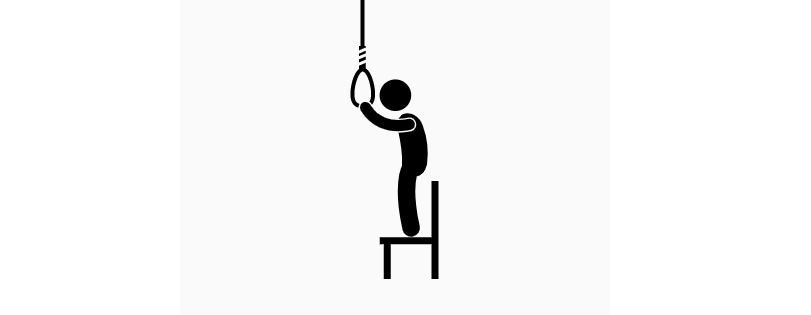





### Introduction
Suicides are a major concern in this world, this disease of murdering self is increasing gradually over time. According to wikipedia, Worldwide suicide rates have increased by 60% in the past 45 years, mainly in the developing countries and about a million people died of suicide every year (this means that 16 out of every 100,000 people in the world died from suicide every year) A person completed suicide every 40 seconds.
It is majorly caused due to:
1. Mental Disorders (Emotions, Substance Abuse etc)
2. Medical Conditions
3. Media Coverage



### Objective
In this report, I have a come up with a case study of overview of suicides by performing an exploratory data analysis on the "Suicides rates overview dataset" that contains the information of these cases for a number of countries from 1985 to 2016 to extract the main parameters vulnerable to the increasing to suicidal rates.

In [37]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1. The dataset

In [38]:
df1=pd.read_csv('master.csv')
#df1['suicides/100k pop']=np.round(df1['suicides/100k pop'],0)
df1.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## 2. Some data pre-processing

Text(0.5, 1.0, 'Visualization of any null values')

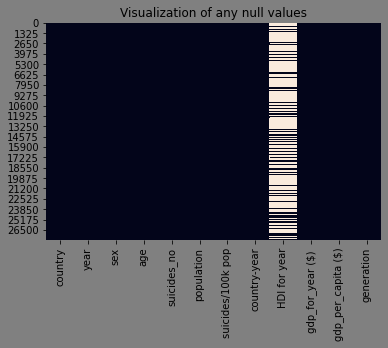

In [39]:
plt.figure(facecolor='grey')
sns.heatmap(df1.isnull(),cbar=False)
plt.title('Visualization of any null values')

In [40]:
print('Percentage of null values:',np.round(100-(((len(df1['HDI for year'])-df1['HDI for year'].isnull().sum())/len(df1['HDI for year'])))*100),2)

Percentage of null values: 70.0 2


From the above heatmap we saw that the column "HDI for year" is carrying 70% of null values which means that it will be much better if we remove this from our analysis.

## 3. Creating Grouped dataframes for data visualizations.

In [41]:
df1=df1.drop(['HDI for year'],axis='columns')
#df1.head()

In [42]:
df1_by_year=df1.groupby(by='year',as_index=False).sum().sort_values(by=['suicides_no'],  ascending=False)
#df1_by_year.head()

In [43]:
df1_by_country=df1.groupby(by='country',as_index=False).sum().sort_values(by=['suicides_no'],  ascending=False)
#df1_by_country.head()

In [44]:
df1_by_age=df1.groupby(by='age',as_index=False).sum().sort_values(by=['suicides_no'],  ascending=False)
#df1_by_age.head()

In [45]:
df1_by_sex=df1.groupby(by='sex',as_index=False).sum().sort_values(by=['suicides_no'],  ascending=False)
#df1_by_sex.head()

In [46]:
df1_by_generation=df1.groupby(by='generation',as_index=False).sum().sort_values(by=['suicides_no'],  ascending=False)

## 4. Visualizations

In [47]:
px.choropleth(df1_by_country,locations='country',locationmode='country names',color='suicides/100k pop',projection='orthographic'
,labels={'suicides/100k pop':'Suicides per 100k people'},title='Suicides per 100k population for different countries (Drag to move)')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Total number of cases each year')

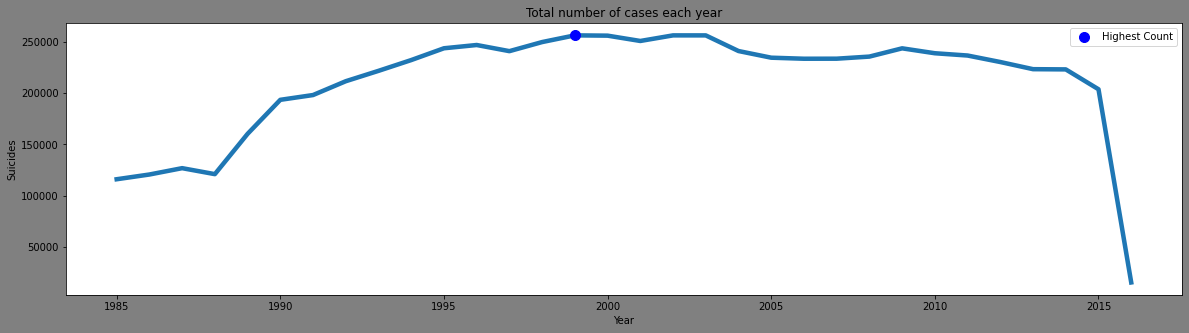

In [48]:
plt.figure(figsize=(20,5),facecolor='grey')
ax=sns.lineplot(df1_by_year.year,df1_by_year.suicides_no,linewidth=4.5)
x = ax.lines[0].get_xdata() # Get the x data of the distribution
y = ax.lines[0].get_ydata() # Get the y data of the distribution
maxid = np.argmax(y) # The id of the peak (maximum of y data)
plt.plot(x[maxid],y[maxid], 'bo', ms=10,label='Highest Count')
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.legend()
plt.title('Total number of cases each year')

In [49]:
px.bar(df1_by_country,x='country',y='suicides_no',labels={'country':'Country','suicides_no':'Suicides'},title='Total Cases in each country (Drag to zoom)')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.


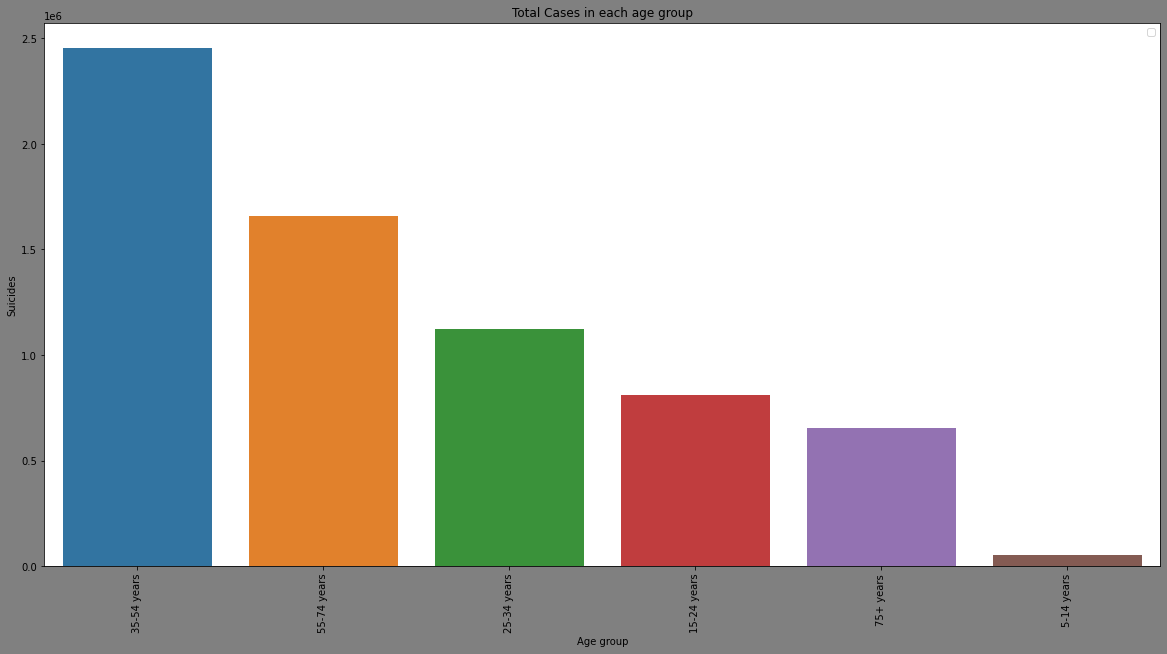

In [50]:
plt.figure(figsize=(20,10),facecolor='grey')
sns.barplot(df1_by_age.age,df1_by_age.suicides_no)
plt.xticks(rotation=90)
plt.xlabel('Age group')
plt.ylabel('Suicides')
plt.title('Total Cases in each age group')
plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.


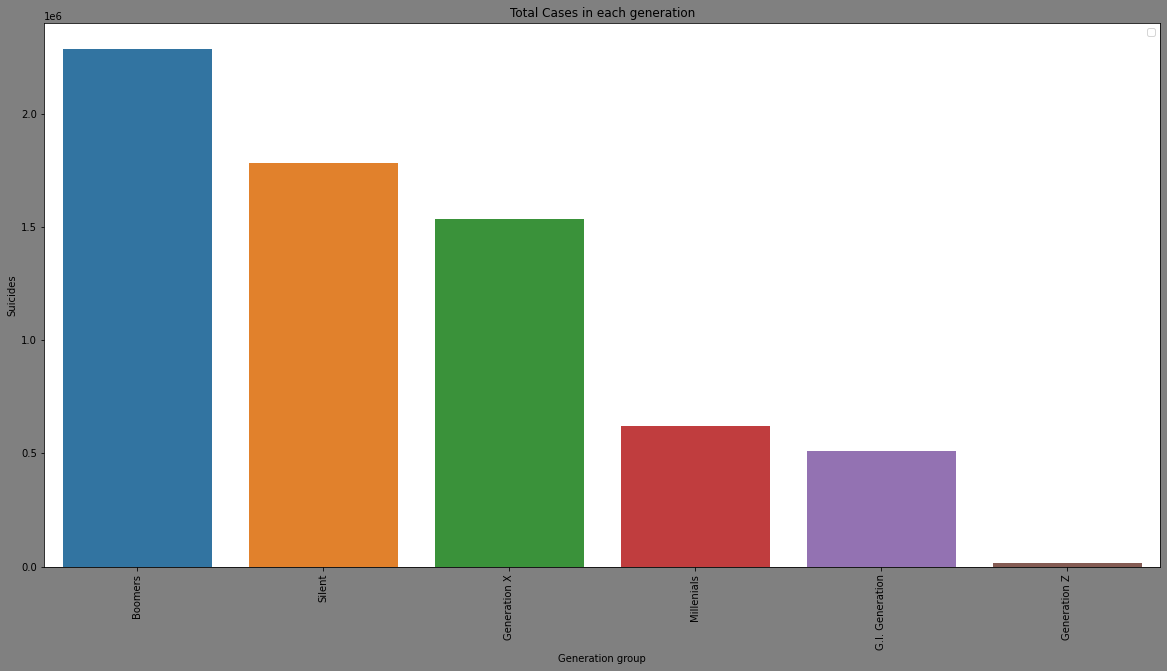

In [51]:
plt.figure(figsize=(20,10),facecolor='grey')
sns.barplot(df1_by_generation.generation,df1_by_generation.suicides_no)
plt.xticks(rotation=90)
plt.xlabel('Generation group')
plt.ylabel('Suicides')
plt.title('Total Cases in each generation')
plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.


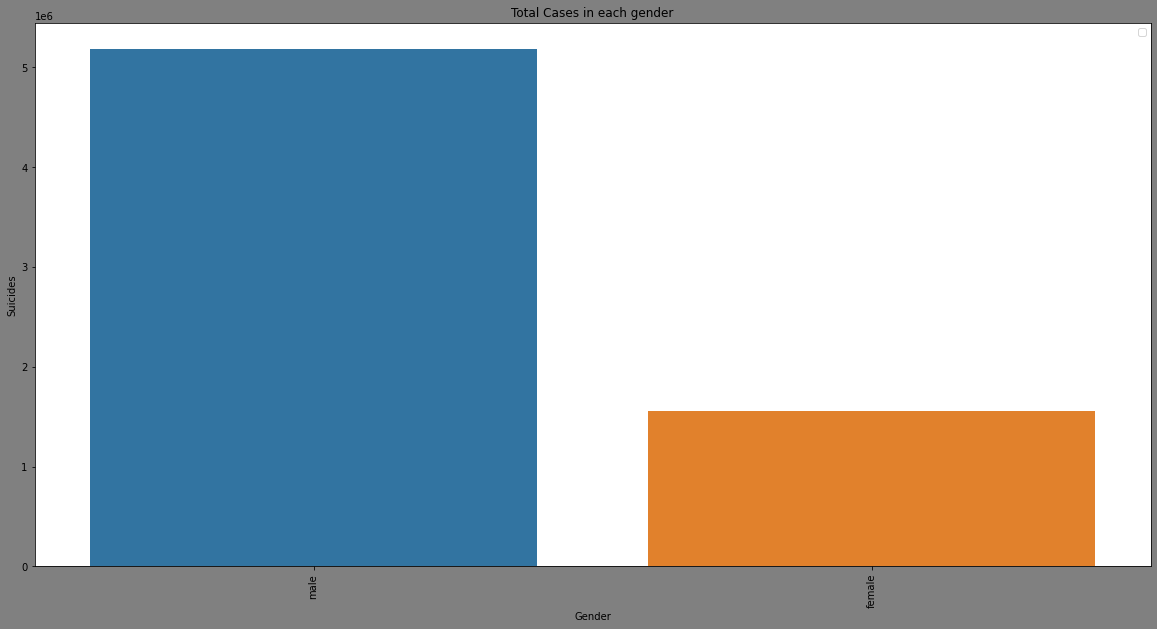

In [52]:
plt.figure(figsize=(20,10),facecolor='grey')
sns.barplot(df1_by_sex.sex,df1_by_sex.suicides_no)
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.ylabel('Suicides')
plt.title('Total Cases in each gender')
plt.legend()

## Conclusion 1
From all of the above plots we can come to the following conclusion as shown below.

In [53]:
#Conclusion
print('1. Highest suicides by year:')
print('Highest number of suicides happened in',df1_by_year.year[df1_by_year['suicides_no'].idxmax()]
      ,'with a number of',df1_by_year['suicides_no'].max(),'cases.')
print('---------------------------------------------------------------------------------------')
print('2. Highest suicides by country:')
print('Highest number of suicides throughout the timeline happened in',df1_by_country.country[df1_by_country['suicides_no'].idxmax()]
      ,'with a number of',df1_by_country['suicides_no'].max(),'cases.')
print('---------------------------------------------------------------------------------------')
print('3. Highest suicides by age group:')
print('Highest number of suicides happened in the age group of',df1_by_age.age[df1_by_age['suicides_no'].idxmax()]
      ,'with a number of',df1_by_age['suicides_no'].max(),'cases.')
print('---------------------------------------------------------------------------------------')
print('4. Highest suicides by gender:')
print('Highest number of suicides were committed by',df1_by_sex.sex[df1_by_sex['suicides_no'].idxmax()]
      ,'group with a number of',df1_by_sex['suicides_no'].max(),'cases.')
print('---------------------------------------------------------------------------------------')
print('5. Highest suicides by generation:')
print('Highest number of suicides were committed by',df1_by_generation.generation[df1_by_generation['suicides_no'].idxmax()]
      ,'generation with a number of',df1_by_generation['suicides_no'].max(),'cases.')

1. Highest suicides by year:
Highest number of suicides happened in 1999 with a number of 256119 cases.
---------------------------------------------------------------------------------------
2. Highest suicides by country:
Highest number of suicides throughout the timeline happened in Russian Federation with a number of 1209742 cases.
---------------------------------------------------------------------------------------
3. Highest suicides by age group:
Highest number of suicides happened in the age group of 35-54 years with a number of 2452141 cases.
---------------------------------------------------------------------------------------
4. Highest suicides by gender:
Highest number of suicides were committed by male group with a number of 5188910 cases.
---------------------------------------------------------------------------------------
5. Highest suicides by generation:
Highest number of suicides were committed by Boomers generation with a number of 2284498 cases.


Lets check the correlation of each column with corresponding column in the dataset.

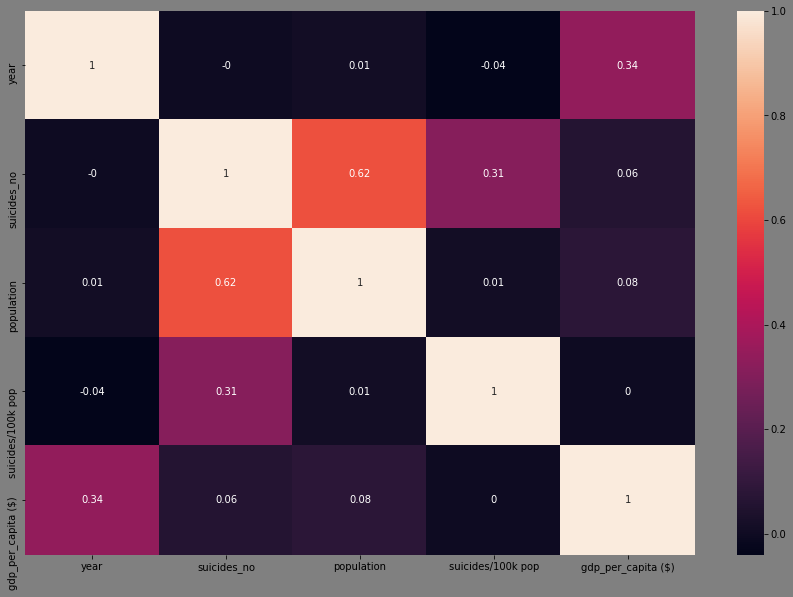

In [54]:
plt.figure(figsize=(15,10),facecolor='grey')
sns.heatmap(np.round(df1.corr(),2),annot=True)

## 3-D plot
Lets take this visualization to a much interesting stage, below I have visualized the number of suicides for each age group (and color coded by different gender) with a variation in each year in 3 different axes with the help of plotly's 3-D scatter plot.

In [55]:
df1_by_age_sex=df1.groupby(by=['age','sex','year'],as_index=False).sum()
fig=px.scatter_3d(df1_by_age_sex,x='age',y='suicides_no',z='year',color='sex'
,labels={'year':'Year','age':'Age group','suicides_no':'Total cases'}
,title='3-D plot for number of cases in each age group of different genders corresponding to each year (Drag to move)')
#fig.update_layout(plot_bgcolor='rgba(0,0,0,10)')
fig.show()

## Conclusion 2
Wow, so this above plot is giving more clarity to our conclusion for the highest number of cases in the age groups. Since, it was concluded that people with age between 35-54 years show more cases of suicides, this 3-D plot shows exactly in which year there were highest number of cases for that group and also by which gender, i.e the Male group between 35-54 years old around year 2000 has highest number of suicide cases.

## Categorizing
Since, we have the number of cases per 100k of population available in the dataset. So, now we can categorize each country among 4 categories (i.e Low, Medium, High and Very high) based on the number of cases per 100k population.
But first lets look at the distribution of this column of dataframe with the help of the boxplots which will also visualize the presence of any outliers in the data.

Text(0.5, 1.0, 'Distribution of suicides per 100k population')

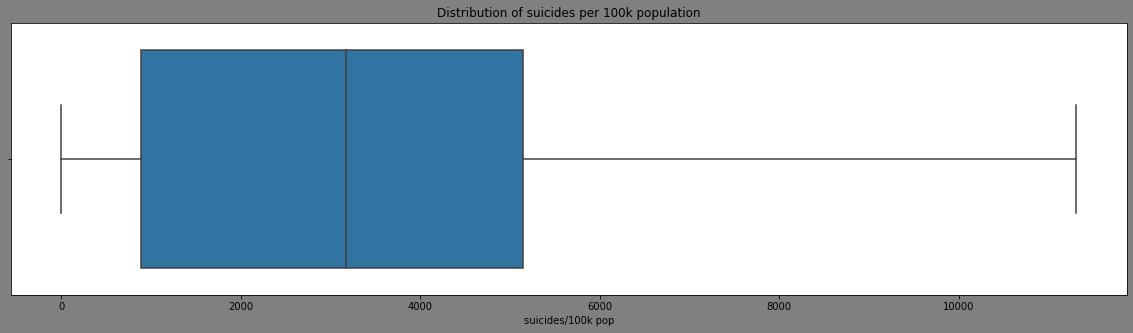

In [56]:
plt.figure(figsize=(20,5),facecolor='grey')
sns.boxplot(x=df1_by_country['suicides/100k pop'])
plt.title('Distribution of suicides per 100k population')

Okay, so there are no outliers in this data which makes it perfect for categorizing the countries.
In below, I have specified the 4 conditions to categorize the data (i.e less than 25%, between 25-50%, between 50-75% and more than 75%) and assigned the values (i.e categories) to the data that satisfies each condition.

In [57]:
cond=[
df1_by_country['suicides/100k pop']<=np.percentile(df1_by_country['suicides/100k pop'],25),
(df1_by_country['suicides/100k pop']>np.percentile(df1_by_country['suicides/100k pop'],25)) & (df1_by_country['suicides/100k pop']<=np.percentile(df1_by_country['suicides/100k pop'],50)),
(df1_by_country['suicides/100k pop']>=np.percentile(df1_by_country['suicides/100k pop'],50)) & (df1_by_country['suicides/100k pop']<=np.percentile(df1_by_country['suicides/100k pop'],75)),
(df1_by_country['suicides/100k pop']>=np.percentile(df1_by_country['suicides/100k pop'],75)) & (df1_by_country['suicides/100k pop']<=np.percentile(df1_by_country['suicides/100k pop'],100))]
category=['Low','Medium','High','Very High']

Countries are now categorized successfully, now lets insert this information as a new column in the dataset of "grouped by countries".

In [58]:
df1_by_country.insert(6,'Category',np.select(cond,category))
#df1_by_country.head()

Now lets look at the distribution of GDP per capita corresponding to each category.

In [59]:
px.box(df1_by_country,x='Category',y='gdp_per_capita ($)',color='Category',title='GDP per capita distribution for each category')

## Conclusion 3
As you can see in the above visualization, the countries categorized as "Medium" are having the least GDP per capita whereas countries categorized as "Very High" are having the highest GDP per capita.
> Which means, 50% of GDP per capita of countries with very high cases is more than 75% of GDP per capita of countries with medium cases.

## Map visualizations (animated)
Till now, we looked at the number cases for each parameter and also analysed each category of country. Now let's look at the number of cases per 100k population for each country in the map given below for each year.
> In this, I have made an animated choropleth plot which colours each country based on the number of cases per 100k people in that country that will be changing for each year as animation frame.

In [60]:
df1_by_country_year=df1.groupby(by=['country','year'],as_index=False).sum()
#df1_by_country_year.head()

In [61]:
px.choropleth(df1_by_country_year,locations='country',color='suicides/100k pop',animation_frame='year'
,animation_group='country',locationmode='country names',projection='natural earth'
,labels={'suicides/100k pop':'Cases per 100k population','year':'Year'},title='Suicide cases per 100k population in each country corresponding to each year')

## Conclusion 4
> 1. Major part of Asia & Africa are not showing any visualization which may mean that there were no suicide cases in that parts in that year, but it is not practically possible. So, it can mean that the information for these countries is not available.
> 2. Russia seems to be ahead in almost every year as it is present in the upper portion of colour scale for many years.

## Scatter plot (animated)
Now let's have a visulization that shows variations of various parameters collectively in a single plot.
> In this, I have made an animated scatter plot which shows the variation of suicides per 100k population for each country (where each country is assigned a colour) corresponding to their GDP per capita for each year (year is the animation frame), and the size of the bubbles below represent the total number of suicides for that country on that particular year.

In [62]:
px.scatter(df1_by_country_year,x='gdp_per_capita ($)',y='suicides/100k pop',size='suicides_no',size_max=60
           ,color='country',animation_frame='year',animation_group='country'
           ,labels={'country':'Countries','suicides/100k pop':'Suicides per 100k population','year':'Year','gdp_per_capita ($)':'GDP per capita ($)'}
           ,title='Dependancy of Suicides per 100k population on GDP per capita of every country each year')

Now, if we look carefully at the above plot then we can see that the movement of those bubbles over each animation frame is in a linear direction irrespective of their size.
But in order to have an overall conclusion for the above analysis we can have a look the regression plot shown below.




Text(0.5, 1.0, 'Overall dependancy of suicides per 100k population on GDP per capita')

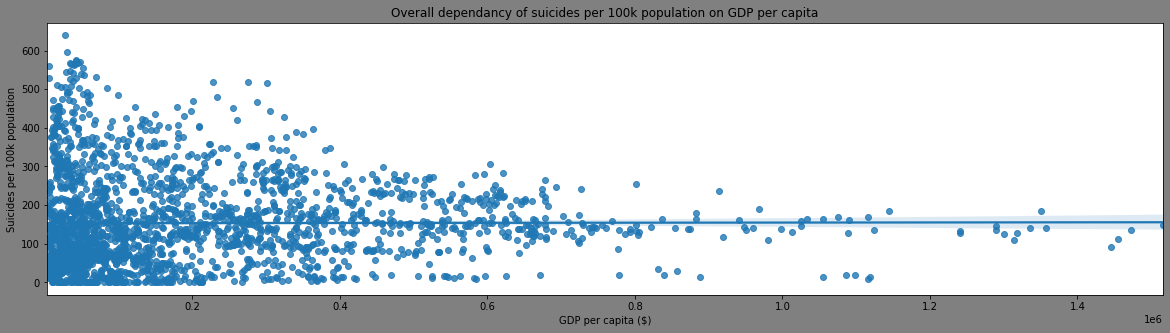

In [63]:
plt.figure(figsize=(20,5),facecolor='grey')
sns.regplot(x=df1_by_country_year['gdp_per_capita ($)'],y=df1_by_country_year['suicides/100k pop'])
plt.xlabel('GDP per capita ($)')
plt.ylabel('Suicides per 100k population')
plt.title('Overall dependancy of suicides per 100k population on GDP per capita')

## Conclusion 5
The line of regression in the above plot is completly parallel to the x-axis, which means that number of suicides per 100k people does not depend on the GDP per capita for that country.

## Timeline analysis for genders, age group and generation.

In [64]:
df1_by_sex_year=df1.groupby(by=['sex','year'],as_index=False).sum()
px.line(df1_by_sex_year,x='year',y='suicides_no',color='sex',labels={'year':'Year','sex':'Gender','suicides_no':'Suicide Cases'},title='Timeline visualization for Genders')

### Conclusion for genders' timline analysis:
There was a sudden increase in the cases right after 1988 for both genders but individually, the male group showed a rate of increase in cases more than that of females till 2015 and after that they both started decreasing suddenly. This might be due to the fact that availability of information started decreasing after 2015.


In [66]:
df1_by_age_year=df1.groupby(by=['age','year'],as_index=False).sum()
px.line(df1_by_age_year,x='year',y='suicides_no',color='age'
,labels={'year':'Year','age':'Age','suicides_no':'Suicide Cases'},title='Timeline visualization for Ages')

### Conclusion for Age groups' timeline analysis:
Same type of increase was shown from 1988 as that of the genders' analysis. The highest amount of increase in number of suicides was shown by age group of 35-54 years and age group of 5-14 years may be seeming to show an almost linear behaviour when compared to others but after magnification we can see that it also varies between 800 to 2095 cases.

In [67]:
df1_by_gen_year=df1.groupby(by=['generation','year'],as_index=False).sum()
px.line(df1_by_gen_year,x='year',y='suicides_no',color='generation'
,labels={'year':'Year','generation':'Generation','suicides_no':'Suicide Cases'},title='Timeline visualization for generations')

### Conclusion for generations' timeline analysis:
This visualization might seem a bit weird because of rapid variations in the behaviours of each lines. But after seeing individually, "Boomers" varied in cases between 4715 and 125k (irrespective of information availability) which is very huge. On the other hand we can see that "Generation Z" may seem to have a linear behaviour but it also varies between 1640 and 1882 which is very small compared to "Boomers". Note that the cause of invisibility of lines before and after a year is not due to information unavailability, it is because they were defined to be present for that range of years.
In order to understand each generation in detail [click here](https://www.kasasa.com/articles/generations/gen-x-gen-y-gen-z).

## Analysis of number of cases for each gender belonging to each age group

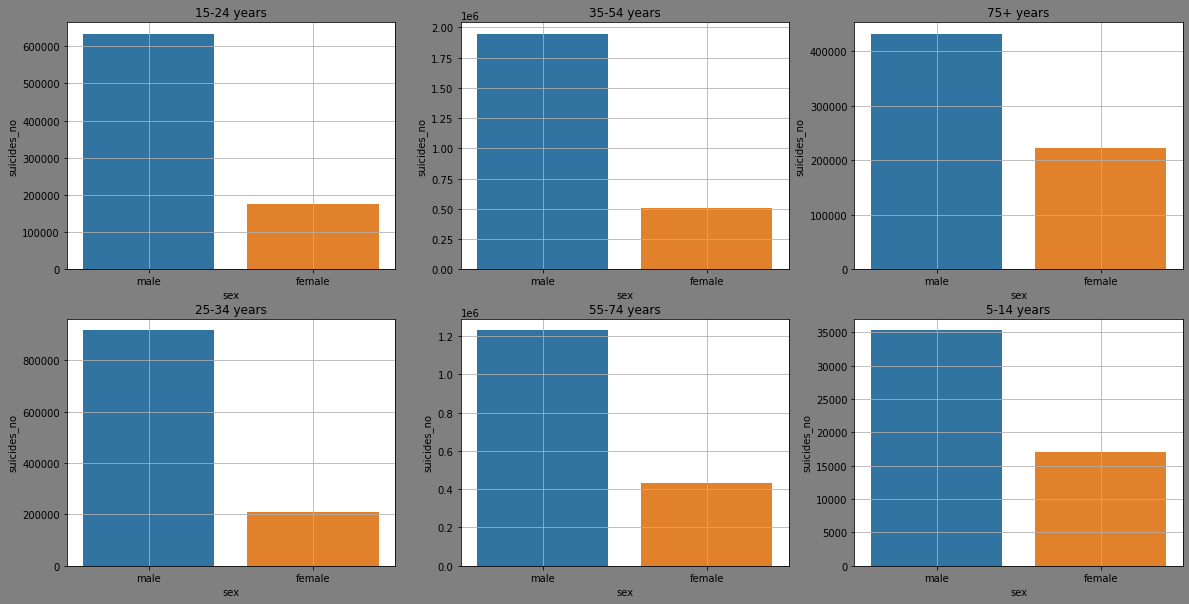

In [65]:
df1_by_age_sex=df1.groupby(by=['age','sex'],as_index=False).sum().sort_values(by=['suicides_no'],  ascending=False)
ages=np.array(df1.age.unique())
ax=plt.figure(figsize=(20,10),facecolor='grey')
for i in range(0,6):
  ax.add_subplot(2,3,i+1)
  sns.barplot(data=df1_by_age_sex[df1_by_age_sex.age==ages[i]],x='sex',y='suicides_no')
  plt.title(ages[i])
  plt.grid()

## Conclusion 6
We should know that "1e6" in the 2 plots(35-54 years and 55-74 years) says that number of suicides were multiplied with $10^6$ to get actual number of cases. So here, highest number of cases were shown in these two given plots (by males in both) of approximately 1.95 million (in 35-54 years) and 1.02 million (in 55-74 years).

## Analysis of top-5 countries based on the number of cases.
In this, we will be analysing the top-5 countries with highest number of cases distinguished in 3 parameters (i.e Sex, age and generation) and categorized according to each parameter.
> One important point, here I have chosen the column containing number of cases per 100k people for each country. But, I simply could have gone for the column containing just the number of suicides for that country. I am not mentioning the reason as you can think about it by yourselves obviously.

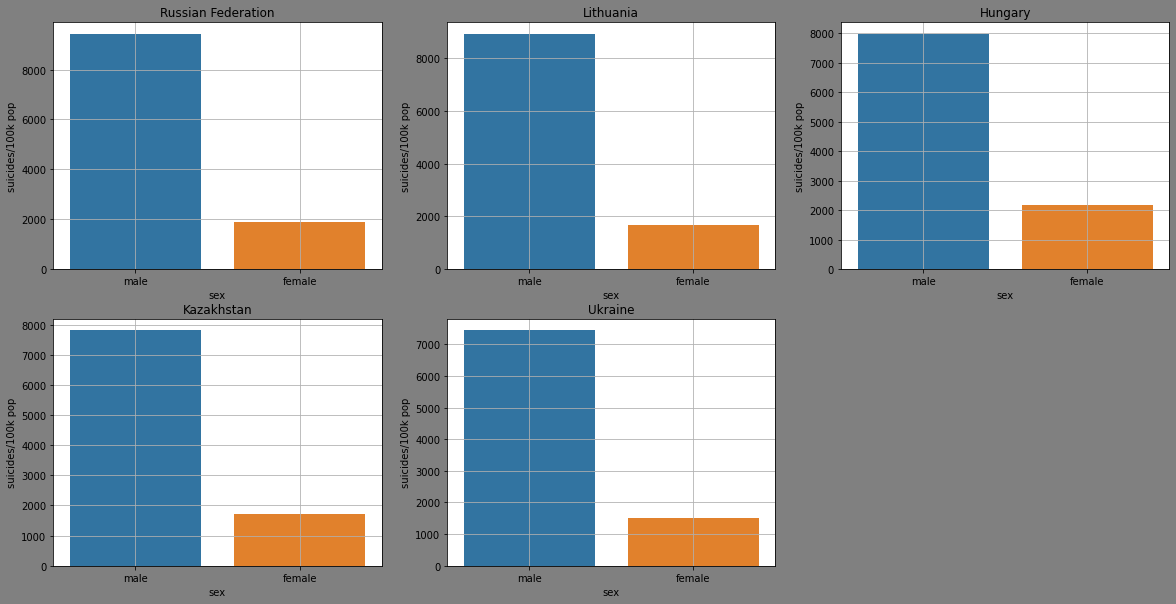

In [81]:
df1_by_country_sex=df1.groupby(by=['country','sex'],as_index=False).sum().sort_values(by=['suicides/100k pop'],  ascending=False)
countries=np.array(df1_by_country_sex.country.head(5))
ax=plt.figure(figsize=(20,10),facecolor='grey')
for i in range(0,5):
  ax.add_subplot(2,3,i+1)
  sns.barplot(data=df1_by_country_sex[df1_by_country_sex.country==countries[i]],x='sex',y='suicides/100k pop')
  plt.title(countries[i])
  plt.grid()

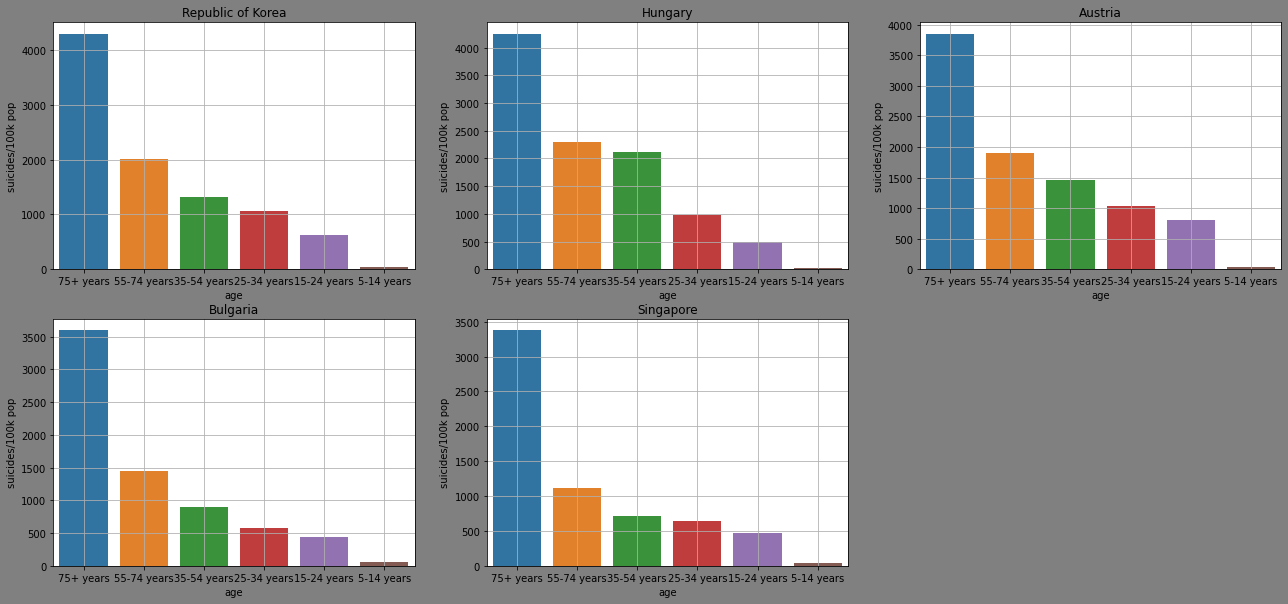

In [77]:
df1_by_country_age=df1.groupby(by=['country','age'],as_index=False).sum().sort_values(by=['suicides/100k pop'],  ascending=False)
countries=np.array(df1_by_country_age.country.head(5))
ax=plt.figure(figsize=(22,10),facecolor='grey')
for i in range(0,5):
  ax.add_subplot(2,3,i+1)
  sns.barplot(data=df1_by_country_age[df1_by_country_age.country==countries[i]],x='age',y='suicides/100k pop')
  plt.title(countries[i])
  plt.grid()

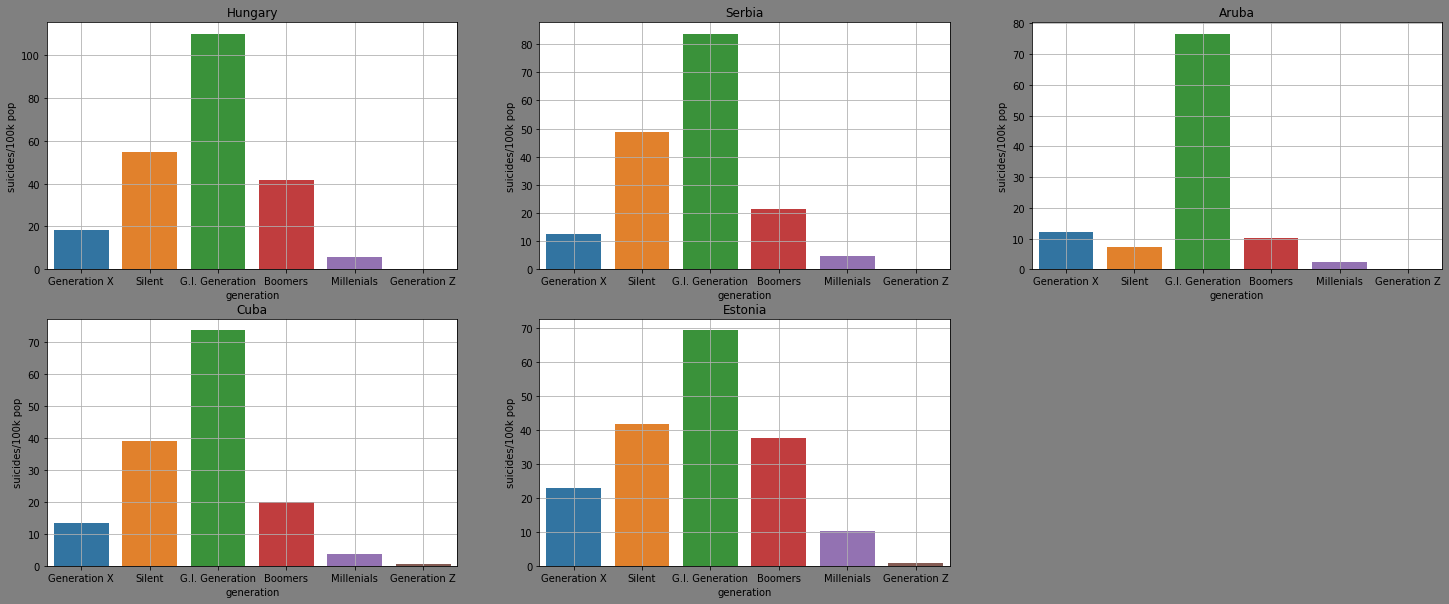

In [78]:
df1_by_country_gen=df1.groupby(by=['country','generation'],as_index=False).mean().sort_values(by=['suicides/100k pop'],  ascending=False)
countries=np.array(df1_by_country_gen.country.head(5))
ax=plt.figure(figsize=(25,10),facecolor='grey')
for i in range(0,5):
  ax.add_subplot(2,3,i+1)
  sns.barplot(data=df1_by_country_gen[df1_by_country_gen.country==countries[i]],x='generation',y='suicides/100k pop',order=df1['generation'].unique())
  plt.title(countries[i])
  plt.grid()

## Conclusion 7:
After analysing each plot collectively we can say that every country shows almost a similar behaviour with some differences among each of them as well.
>In the analysis based on genders, the difference in behaviour of pattern was about few hundreds of cases between each country.
>In the analysis based on ages, the difference in behaviour of pattern was around half a thousand between each country.
>In the analysis based on generations, the difference in behaviour of pattern was the least than the above two and that was only around 10 to 20 cases between each country.

But these 3 different analysis' collectively create a huge difference in that data as we have seen in the map plotting.

## Results of EDA:
1. Russia remains ahead in number of suicides per 100k of its population throught the time period.

2. We have to collect the informations indicating the reasons behind huge number of suicides among the people with age group between 35-54 years. Are they doing this because of poverty or unemployability or any other reasons?

### There is an urgent need to analyse the cause of this problem to work on the solution as soon as possible.

### My dream would be 'To see a linear line at 0 while doing a timeline analysis for the suicide cases for every country in the future'.


# Stay cheerful, Stay blessed, Stay happy.